In [1]:

import pandas as pd
import numpy as np
import os

In [46]:
try:
    Customers = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Customers.csv", encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying ISO-8859-1 encoding...")
    Customers = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Customers.csv", encoding='ISO-8859-1')
Calendar = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Calendar.csv")
Products = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Products.csv", skiprows=1)
Sales_2015 = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Sales_2015.csv")
Sales_2016 = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Sales_2016.csv")
Sales_2017 = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Sales_2017.csv")
Territories = pd.read_csv(r"C:\Users\MSI MODRON\Documents\GitHub\DW-Final-Project\Data\raw\Territories.csv")


UTF-8 decoding failed, trying ISO-8859-1 encoding...


In [29]:
Products = Products.loc[:, ~Products.columns.str.contains('^Unnamed')]

# Remove columns labeled 
Products = Products.loc[:, ~Products.columns.str.contains('Delete me', case=False)]

# Check if required columns exist before proceeding
required_columns = ['ProductKey', 'ProductSubcategoryKey', 'ProductName']
if all(col in Products.columns for col in required_columns):
    Products.dropna(subset=['ProductKey', 'ProductSubcategoryKey'], inplace=True)
Products = Products.dropna(subset=['ProductColor'])
    
    

In [48]:
# Display the first few rows of the Products dataframe
print(Products.head())

# Display summary information about the Products dataframe
print(Products.info())

# Check for missing values in the Products dataframe
print(Products.isnull().sum())

# Display descriptive statistics for the Products dataframe
print(Products.describe())


   ProductKey  ProductSubcategoryKey ProductSKU              ProductName  \
0         214                     31  HL-U509-R    Sport-100 Helmet, Red   
1         215                     31    HL-U509  Sport-100 Helmet, Black   
2         218                     23  SO-B909-M   Mountain Bike Socks, M   
3         219                     23  SO-B909-L   Mountain Bike Socks, L   
4         220                     31  HL-U509-B   Sport-100 Helmet, Blue   

             ModelName                                 ProductDescription  \
0            Sport-100  Universal fit, well-vented, lightweight , snap...   
1            Sport-100  Universal fit, well-vented, lightweight , snap...   
2  Mountain Bike Socks  Combination of natural and synthetic fibers st...   
3  Mountain Bike Socks  Combination of natural and synthetic fibers st...   
4            Sport-100  Universal fit, well-vented, lightweight , snap...   

  ProductColor ProductSize ProductStyle  ProductCost  ProductPrice  
0          

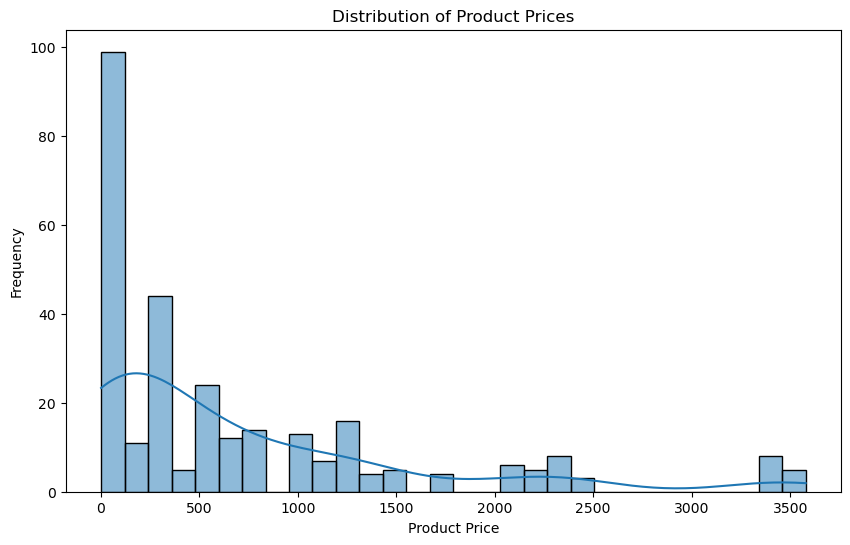

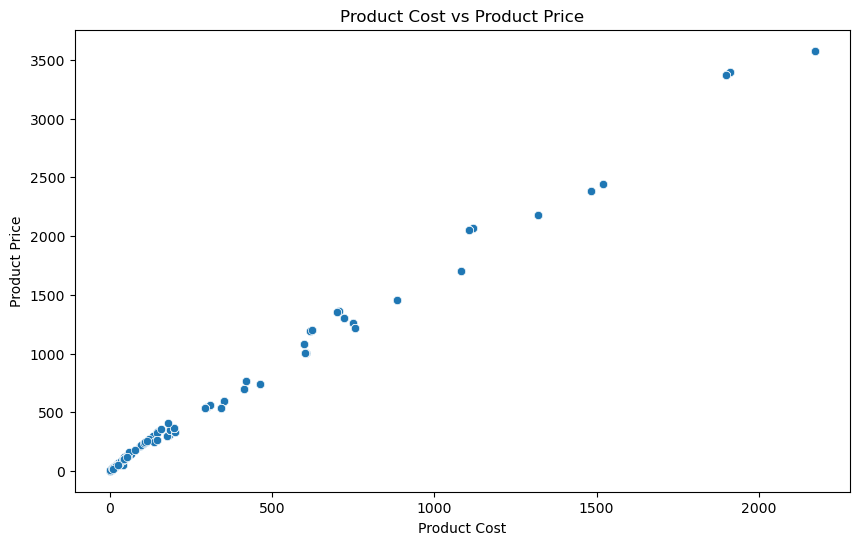

In [63]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(Products['ProductPrice'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between Product Cost and Product Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ProductCost', y='ProductPrice', data=Products)
plt.title('Product Cost vs Product Price')
plt.xlabel('Product Cost')
plt.ylabel('Product Price')
plt.show()



In [23]:
 # Combine all sales data 
combined_sales = pd.concat([Sales_2015, Sales_2016, Sales_2017])
    
# Remove rows with missing essential fields
combined_sales.dropna(subset=['OrderDate', 'ProductKey', 'CustomerKey', 'OrderQuantity'], inplace=True)
    
    # Ensure OrderDate is in datetime format
combined_sales['OrderDate'] = pd.to_datetime(combined_sales['OrderDate'], errors='coerce')
    
   

In [13]:
 # Combine all sales data 
combined_sales = pd.concat([Sales_2015, Sales_2016, Sales_2017])
    
# Remove rows with missing essential fields
combined_sales.dropna(subset=['OrderDate', 'ProductKey', 'CustomerKey', 'OrderQuantity'], inplace=True)
    
    # Ensure OrderDate is in datetime format
combined_sales['OrderDate'] = pd.to_datetime(combined_sales['OrderDate'], errors='coerce')
    
combined_sales

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2015-01-01,9/21/2001,SO45080,332,14657,1,1,1
1,2015-01-01,12/5/2001,SO45079,312,29255,4,1,1
2,2015-01-01,10/29/2001,SO45082,350,11455,9,1,1
3,2015-01-01,11/16/2001,SO45081,338,26782,6,1,1
4,2015-01-02,12/15/2001,SO45083,312,14947,10,1,1
...,...,...,...,...,...,...,...,...
29476,2017-06-30,3/22/2004,SO74143,477,28517,10,3,2
29477,2017-06-30,3/15/2004,SO74143,479,28517,10,2,1
29478,2017-06-30,4/8/2004,SO74143,606,28517,10,1,1
29479,2017-06-30,5/15/2004,SO74124,480,21676,7,2,2


In [49]:

# Display the first few rows of the Sales dataframe
print(combined_sales.head())

# Display summary information about the Sales dataframe
print(combined_sales.info())

# Check for missing values in the Sales dataframe
print(combined_sales.isnull().sum())

# Display descriptive statistics for the Sales dataframe
print(combined_sales.describe())



   OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0 2015-01-01   9/21/2001     SO45080         332        14657             1   
1 2015-01-01   12/5/2001     SO45079         312        29255             4   
2 2015-01-01  10/29/2001     SO45082         350        11455             9   
3 2015-01-01  11/16/2001     SO45081         338        26782             6   
4 2015-01-02  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity  
0              1              1  
1              1              1  
2              1              1  
3              1              1  
4              1              1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56046 entries, 0 to 29480
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderDate      56046 non-null  datetime64[ns]
 1   StockDate      56046 non-null  object        
 2   Orde

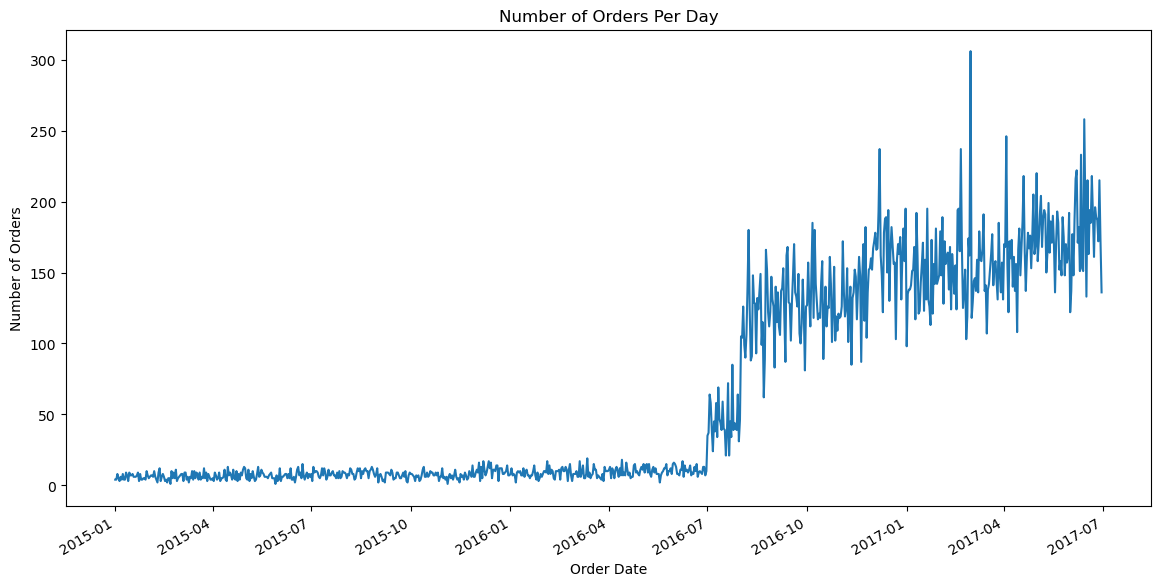

In [57]:

# Plot the number of orders per day
plt.figure(figsize=(14, 7))
combined_sales['OrderDate'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Orders Per Day')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.show()




In [45]:
most_common_gender = Customers['Gender'].mode()[0]
Customers['Gender'].fillna(most_common_gender, inplace=True)
Customers['Prefix'] = Customers.apply(
    lambda row: 'Mr.' if pd.isnull(row['Prefix']) and row['Gender'] == 'Male' else 
                ('Ms.' if pd.isnull(row['Prefix']) and row['Gender'] == 'Female' else 
                 ('undefined' if pd.isnull(row['Prefix']) else row['Prefix'])), axis=1
)




,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,7/4/1958,M,M,tommy2@adventure-works.com,"$30,000",1,Graduate Degree,Clerical,Y
18144,29480,MRS.,NINA,RAJI,11/10/1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y
18145,29481,MR.,IVAN,SURI,1/5/1960,S,M,ivan0@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,N
18146,29482,MR.,CLAYTON,ZHANG,3/5/1959,M,M,clayton0@adventure-works.com,"$30,000",3,Bachelors,Clerical,Y


In [50]:


# Display the first few rows of the Customers dataframe
print(Customers.head())

# Display summary information about the Customers dataframe
print(Customers.info())

# Check for missing values in the Customers dataframe
print(Customers.isnull().sum())

# Display descriptive statistics for the Customers dataframe
print(Customers.describe())



   CustomerKey Prefix  FirstName LastName  BirthDate MaritalStatus Gender  \
0        11000    MR.        JON     YANG   4/8/1966             M      M   
1        11001    MR.     EUGENE    HUANG  5/14/1965             S      M   
2        11002    MR.      RUBEN   TORRES  8/12/1965             M      M   
3        11003    MS.    CHRISTY      ZHU  2/15/1968             S      F   
4        11004   MRS.  ELIZABETH  JOHNSON   8/8/1968             S      F   

                     EmailAddress AnnualIncome  TotalChildren EducationLevel  \
0       jon24@adventure-works.com     $90,000               2      Bachelors   
1    eugene10@adventure-works.com     $60,000               3      Bachelors   
2     ruben35@adventure-works.com     $60,000               3      Bachelors   
3   christy12@adventure-works.com     $70,000               0      Bachelors   
4  elizabeth5@adventure-works.com     $80,000               5      Bachelors   

     Occupation HomeOwner  
0  Professional         Y  


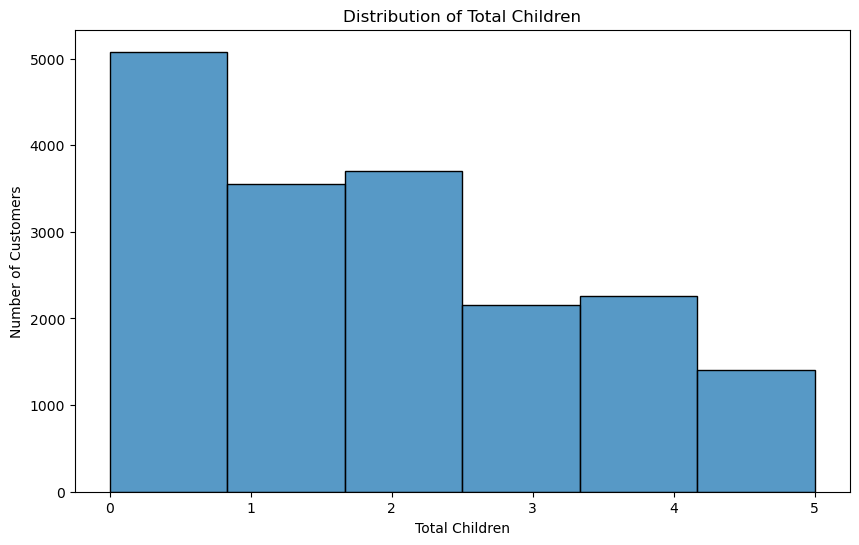

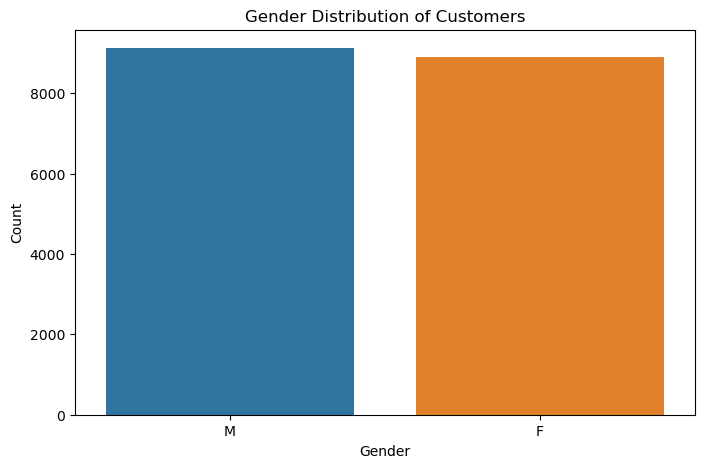

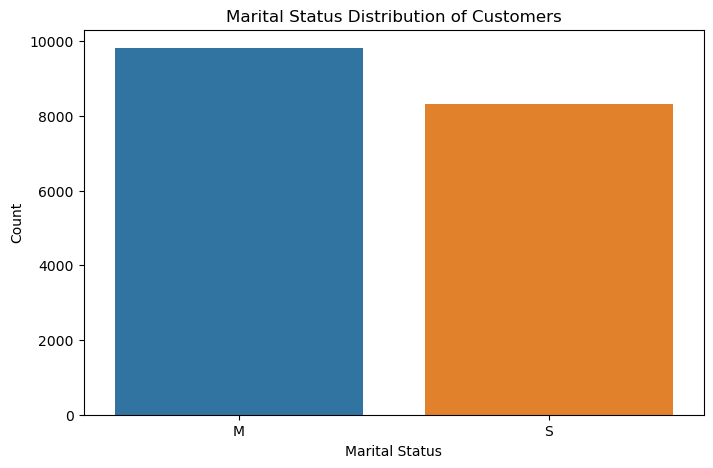

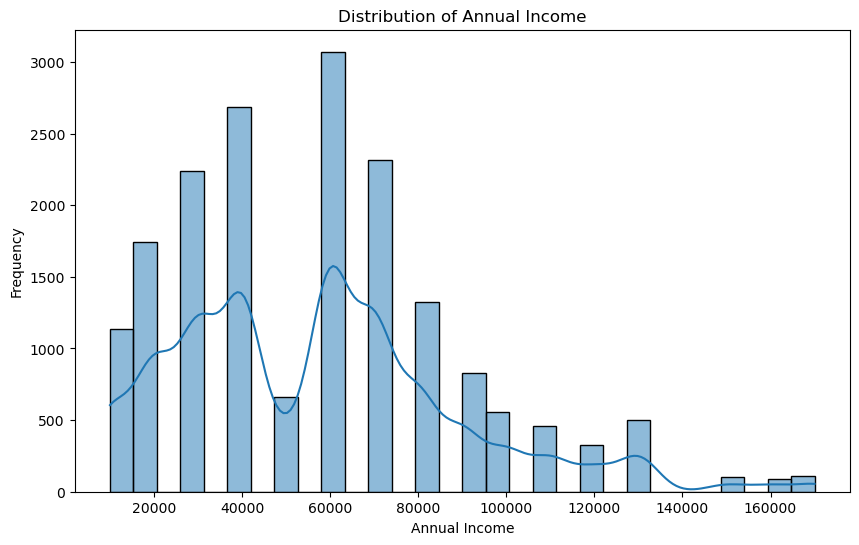

In [59]:

# Plot the distribution of Total Children among customers
plt.figure(figsize=(10, 6))
sns.histplot(Customers['TotalChildren'], bins=6, kde=False)
plt.title('Distribution of Total Children')
plt.xlabel('Total Children')
plt.ylabel('Number of Customers')
plt.show()

# Plot the gender distribution of customers
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=Customers)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot marital status distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='MaritalStatus', data=Customers)
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Convert AnnualIncome to numeric after removing the dollar sign and commas
Customers['AnnualIncome'] = Customers['AnnualIncome'].replace({'[$,]': ''}, regex=True).astype(float)

# Plot the distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(Customers['AnnualIncome'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()



In [51]:

# Display the first few rows of the Territories dataframe
print(Territories.head())

# Display summary information about the Territories dataframe
print(Territories.info())

# Check for missing values in the Territories dataframe
print(Territories.isnull().sum())

# Display descriptive statistics for the Territories dataframe
print(Territories.describe())



   SalesTerritoryKey     Region        Country      Continent
0                  1  Northwest  United States  North America
1                  2  Northeast  United States  North America
2                  3    Central  United States  North America
3                  4  Southwest  United States  North America
4                  5  Southeast  United States  North America
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesTerritoryKey  10 non-null     int64 
 1   Region             10 non-null     object
 2   Country            10 non-null     object
 3   Continent          10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes
None
SalesTerritoryKey    0
Region               0
Country              0
Continent            0
dtype: int64
       SalesTerritoryKey
count           10.00000
mean             5.50000
std  

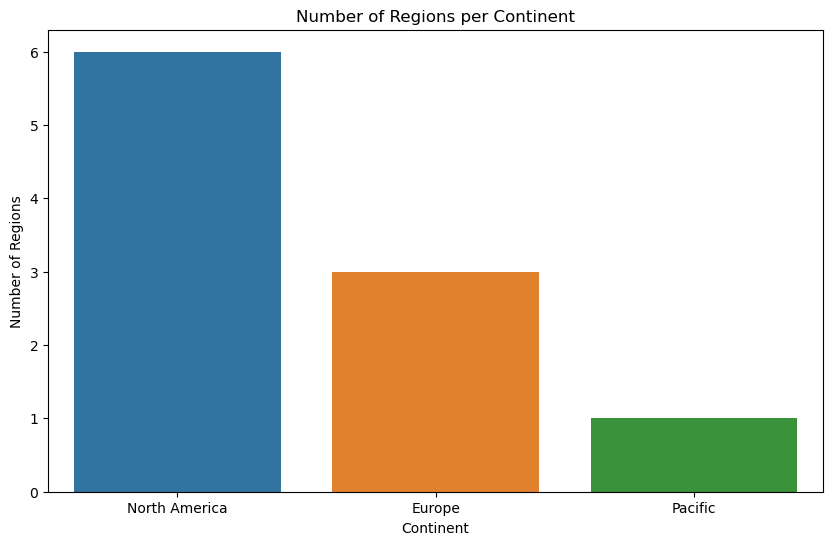

In [61]:

# Plot the number of regions per continent
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=Territories)
plt.title('Number of Regions per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Regions')
plt.show()



In [62]:
import plotly.express as px
import pandas as pd

total_sales = 24914586.8193
unique_customers = 17416

products_data = {
    'productname': ['Water Bottle - 30 oz.', 'Patch Kit/8 Patches', 'Mountain Tire Tube', 'Road Tire Tube', 'Sport-100 Helmet, Red'],
    'sales_count': [3983, 2952, 2846, 2173, 2099]
}

regions_data = {
    'territoryname': ['Australia, Australia', 'Southwest, United States', 'Northwest, United States', 
                      'United Kingdom, United Kingdom', 'Germany, Germany'],
    'total_revenue': [7416460, 4822790, 3095070, 2902560, 2524680]  # تحويل الأرقام من الصيغة العلمية
}

products_df = pd.DataFrame(products_data)
regions_df = pd.DataFrame(regions_data)

fig_products = px.bar(products_df, x='productname', y='sales_count', 
                      title='Top 5 Products by Sales', 
                      labels={'productname': 'Product Name', 'sales_count': 'Sales Count'},
                      color='sales_count', text='sales_count')
fig_products.update_layout(xaxis_tickangle=-45)

fig_pie = px.pie(products_df, names='productname', values='sales_count', 
                 title='Sales Distribution of Top 5 Products')

fig_regions = px.bar(regions_df, x='total_revenue', y='territoryname', 
                     title='Top 5 Regions by Revenue', 
                     labels={'territoryname': 'Region', 'total_revenue': 'Total Revenue'},
                     orientation='h', color='total_revenue', text='total_revenue')

fig_products.show()
fig_pie.show()
fig_regions.show()
